In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.0 MB/s eta 0:00:00


In [5]:
!unzip /content/project-1-at-2025-12-09-12-03-13a8400c.zip -d /content/dataset

Archive:  /content/project-1-at-2025-12-09-12-03-13a8400c.zip
   creating: /content/dataset/images/
   creating: /content/dataset/labels/
  inflating: /content/dataset/classes.txt  
  inflating: /content/dataset/notes.json  
  inflating: /content/dataset/images/69c00600-car63.jpeg  
  inflating: /content/dataset/images/4a559981-car1.jpeg  
  inflating: /content/dataset/images/1ed3c847-car9.jpeg  
  inflating: /content/dataset/images/118fd342-car106.jpeg  
  inflating: /content/dataset/images/6b66fc81-car73.jpeg  
  inflating: /content/dataset/images/ace129d8-car49.jpeg  
  inflating: /content/dataset/images/07d45ab3-car64.jpeg  
  inflating: /content/dataset/images/193bdede-car70.jpeg  
  inflating: /content/dataset/images/6f68367b-car113.jpeg  
  inflating: /content/dataset/images/743e9307-car90.jpeg  
  inflating: /content/dataset/images/8ebe615e-car48.jpeg  
  inflating: /content/dataset/images/a2f6be91-car35.jpeg  
  inflating: /content/dataset/images/a416b071-car80.jpeg  
  inflat

In [6]:
!ls /content/dataset

classes.txt  images  labels  notes.json


In [7]:
from sklearn.model_selection import train_test_split
import os, shutil

base = "/content/dataset"

images = [f for f in os.listdir(base + "/images")]

train, val = train_test_split(images, test_size=0.2, random_state=0)

os.makedirs(base + "/images/train", exist_ok=True)
os.makedirs(base + "/images/val", exist_ok=True)
os.makedirs(base + "/labels/train", exist_ok=True)
os.makedirs(base + "/labels/val", exist_ok=True)

for img in train:
    shutil.move(f"{base}/images/{img}", f"{base}/images/train/{img}")
    lbl = img.rsplit(".",1)[0] + ".txt"
    shutil.move(f"{base}/labels/{lbl}", f"{base}/labels/train/{lbl}")

for img in val:
    shutil.move(f"{base}/images/{img}", f"{base}/images/val/{img}")
    lbl = img.rsplit(".",1)[0] + ".txt"
    shutil.move(f"{base}/labels/{lbl}", f"{base}/labels/val/{lbl}")

print("Dataset split completed!")


Dataset split completed!


In [9]:
%%writefile /content/dataset/data.yaml
train: /content/dataset/images/train
val: /content/dataset/images/val

nc: 1
names: ["toyota"]

Writing /content/dataset/data.yaml


In [10]:
!pip install ultralytics
from ultralytics import YOLO

model = YOLO("yolov8n.pt")

model.train(
    data="/content/dataset/data.yaml",
    epochs=50,
    imgsz=512,
    name="toyota_train_v1"
)

Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=512, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=toyota_train_v12, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=T

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d740d9a7260>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 


image 1/1 /content/car24.jpeg: 512x384 2 toyotas, 587.6ms
Speed: 23.5ms preprocess, 587.6ms inference, 3.4ms postprocess per image at shape (1, 3, 512, 384)
Results saved to /content/runs/detect/predict


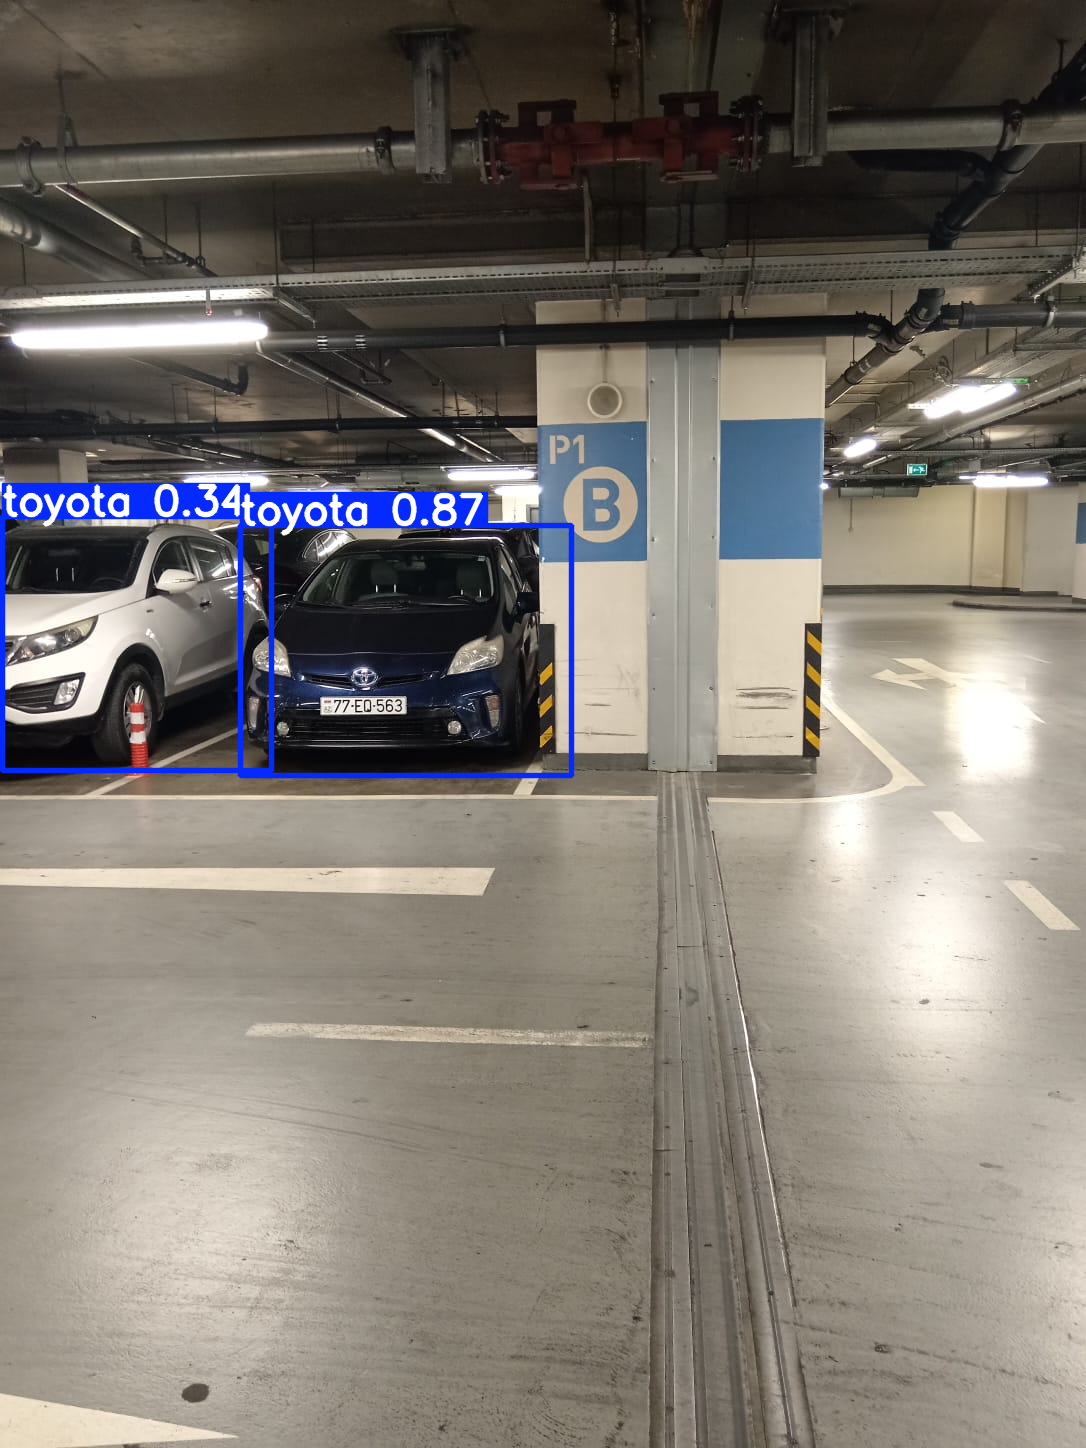

In [11]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load trained model
model = YOLO('/content/runs/detect/toyota_train_v12/weights/best.pt')

# Path to test image
test_image = '/content/car24.jpeg'  # change to your image

# Run prediction
results = model.predict(source=test_image, conf=0.25, save=True)

# Display the result
results[0].show()